
#### Problem 1
From chapter 2 in TESL, the 2-dimensional dataset is created using the following
procedure:
1. sample mi ∼ N([1, 0]', I) for i = 1, . . . , 5.
2. sample mi ∼ N([0, 1]', I) for i = 6, . . . , 10.
3. sample m from (m1, . . . , m10), each with probability 1/10 and sample xj ∼ N(m, I/5).
4. if m ∈ {m1, . . . , m5}, let xj ∈ {class 1} (otherwise xj ∈ {class 2}).
(Note: save the subclass information (subclasses 1, . . . , 10). You will use this
later.)
5. repeat steps 3 and 4 for j = 1, . . . , 100.


#### Part a:-
Simulate from the above procedure (Gaussian mixture model), and plot the data.
Use 2 separate colors to denote the two classes.

#### Solution:-
1. Setting mean and covariance of distribution 1 
2. Using the multivariate normal to generate data points for this distribution and sampling 5 points out of those as the means of class 0 with subclass 1 to 5.
3. Storing all this information in m1_5 numpy array which is displayed below along with the plot of the 5 means sampled.
4. Repeating the steps 1 to 3 for distribution 2 and storing the information in m6_10 numpy array.

In [1]:
# Importing all required python libraries
%matplotlib inline
import numpy as np
import random
import pandas as pd
import itertools
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import sympy
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
np.random.seed(10)

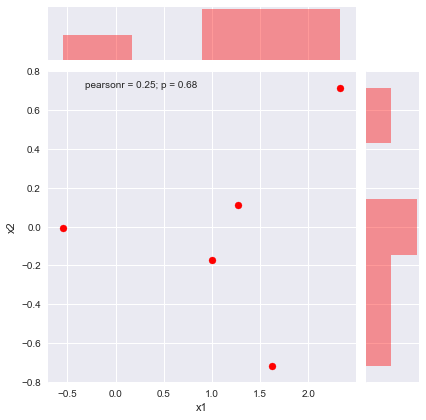

In [2]:
# 1. sample mi ∼ N([1, 0]', I) for i = 1, . . . , 5.
mean1, cov1 = [1, 0], [(1, 0), (0, 1)]
data = np.random.multivariate_normal(mean1, cov1, 5)
df = pd.DataFrame(data, columns=["x1", "x2"])
sns.jointplot(x="x1", y="x2", data=df,color='red');
mean1=np.array(mean1)

In [3]:
m1_5=df.values
m1_5class=np.array([[1,0],
                   [2,0],
                   [3,0],
                   [4,0],
                   [5,0]])
m1_5=np.append(m1_5,m1_5class,axis=1)
m1_5

array([[ 2.3315865 ,  0.71527897,  1.        ,  0.        ],
       [-0.54540029, -0.00838385,  2.        ,  0.        ],
       [ 1.62133597, -0.72008556,  3.        ,  0.        ],
       [ 1.26551159,  0.10854853,  4.        ,  0.        ],
       [ 1.00429143, -0.17460021,  5.        ,  0.        ]])

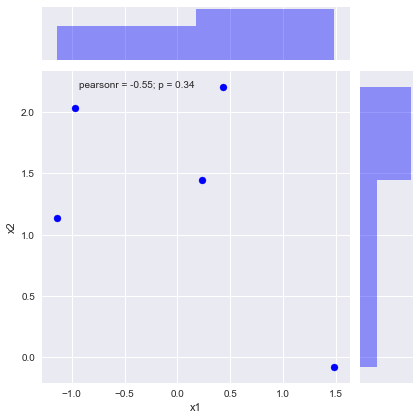

In [4]:
# 2. sample mi ∼ N([0, 1]', I) for i = 6, . . . , 10.
mean2 ,cov2 = [0, 1], [(1, 0), (0, 1)]
data = np.random.multivariate_normal(mean2, cov2, 5)
df2 = pd.DataFrame(data, columns=["x1", "x2"])
sns.jointplot(x="x1", y="x2", data=df2, color='blue');
mean2=np.array(mean2)

In [5]:
m6_10=df2.values
m6_10class=np.array([[6,1],
                   [7,1],
                   [8,1],
                   [9,1],
                   [10,1]])
m6_10=np.append(m6_10,m6_10class,axis=1)
m6_10

array([[  0.43302619,   2.20303737,   6.        ,   1.        ],
       [ -0.96506567,   2.02827408,   7.        ,   1.        ],
       [  0.22863013,   1.44513761,   8.        ,   1.        ],
       [ -1.13660221,   1.13513688,   9.        ,   1.        ],
       [  1.484537  ,  -0.07980489,  10.        ,   1.        ]])

In [6]:
# Saving all the mi's in m1_10 numpy array with their class information
m1_10=np.concatenate((m1_5,m6_10),axis=0)
m1_10 

array([[  2.33158650e+00,   7.15278974e-01,   1.00000000e+00,
          0.00000000e+00],
       [ -5.45400292e-01,  -8.38384993e-03,   2.00000000e+00,
          0.00000000e+00],
       [  1.62133597e+00,  -7.20085561e-01,   3.00000000e+00,
          0.00000000e+00],
       [  1.26551159e+00,   1.08548526e-01,   4.00000000e+00,
          0.00000000e+00],
       [  1.00429143e+00,  -1.74600211e-01,   5.00000000e+00,
          0.00000000e+00],
       [  4.33026190e-01,   2.20303737e+00,   6.00000000e+00,
          1.00000000e+00],
       [ -9.65065671e-01,   2.02827408e+00,   7.00000000e+00,
          1.00000000e+00],
       [  2.28630130e-01,   1.44513761e+00,   8.00000000e+00,
          1.00000000e+00],
       [ -1.13660221e+00,   1.13513688e+00,   9.00000000e+00,
          1.00000000e+00],
       [  1.48453700e+00,  -7.98048858e-02,   1.00000000e+01,
          1.00000000e+00]])

#### Solution(continued):-
After all the means have been stored in m1_10, generation of data is done as:
1. Any 1 mean is selected from the m1_10 array.
2. 10 points are sampled about it using multivariate normal with covariance and mean which was selected in 1 above.
3. The subclass and class information is carried over from the mean to all the data points generated about it. 


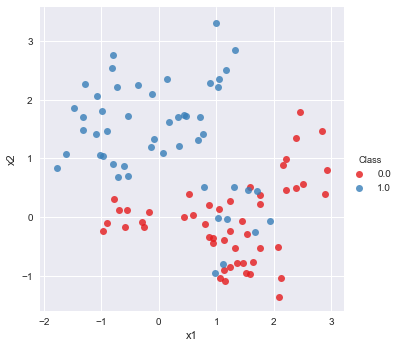

In [7]:
#3. sample m from (m1, . . . , m10), each with probability 
#1/10 and sample xj ∼ N(m, I/5).
#4. if m ∈ {m1, . . . , m5}, let xj ∈ {class 1} (otherwise xj ∈ {class 2}).
df3=pd.DataFrame([])
cov=[(0.2,0),(0,0.2)]
for j in range(10):
    mean=[m1_10[j][0],m1_10[j][1]]
    temp = ([[m1_10[j][2],m1_10[j][3]],
             [m1_10[j][2],m1_10[j][3]],
             [m1_10[j][2],m1_10[j][3]],
             [m1_10[j][2],m1_10[j][3]],
             [m1_10[j][2],m1_10[j][3]],
             [m1_10[j][2],m1_10[j][3]],
             [m1_10[j][2],m1_10[j][3]],
             [m1_10[j][2],m1_10[j][3]],
             [m1_10[j][2],m1_10[j][3]],
             [m1_10[j][2],m1_10[j][3]]
            ])
    data = np.random.multivariate_normal(mean, cov, 10)
    data = np.append(data,temp,axis=1)
    df3 = df3.append(pd.DataFrame(data, 
                    columns=["x1", "x2","Sub Class","Class"]), ignore_index=True)
sns.lmplot(x="x1", y="x2", data=df3, hue='Class', palette= "Set1" ,fit_reg=False)

In [8]:
# Printing some of the data from the dataframe which holds coordinates 
#of data points and the class information for those data points
df3.tail()

,x1,x2,Sub Class,Class
95,1.304993,0.520436,10.0,1.0
96,1.664527,-0.246509,10.0,1.0
97,1.183999,-0.032484,10.0,1.0
98,0.792561,0.521611,10.0,1.0
99,1.709570,0.454325,10.0,1.0


#### Part b:-
Use the least squares method to classify the data. Show a plot denoting your linear
separating boundary. State both false positive and false negative rates.


#### Solution:-
1. Using least squares method to calculate $\hat{\beta}$ using $\hat{\beta} = (X^{T}X)^{-1}X^{T}Y$
2. Calculating $\hat{y}$ using $\hat{\beta}$
3. Plotting the boundary

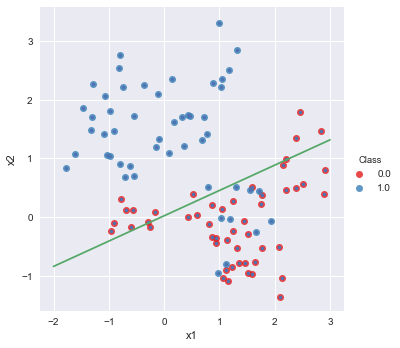

In [9]:
dt=df3.values
dt2=np.delete(dt,np.s_[2:4],axis=1)
dt3=np.delete(dt,np.s_[0:3],axis=1)
dt4=dt2.T
temp1=np.dot(dt4,dt2)
temp1=np.linalg.inv(temp1)
temp2=np.dot(temp1,dt4)
beta_hat=np.dot(temp2,dt3)

xp = np.linspace(-2, 3, 100)
y_hat = np.array(beta_hat[0] + beta_hat[1] * xp)
sns.lmplot(x="x1", y="x2", data=df3, hue='Class', 
                   fit_reg=False, palette= "Set1",line_kws={'color':'k'})
plt.plot(df3['x1'],df3['x2'],'.',xp,y_hat)

Calculating the true positives,false positives,true negatives and false negatives using confusion matrix from sklearn library
1. Calculating the slope of the line.
2. Checking the y values of the point by comparing what its value should have been if it was on the line
3. Assigning predicted class.
Sklearn confusion matrix returns a confusion matrix C is such that C{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.
Thus, the count of true negatives is C{0,0}, false negatives is C{1,0}, true positives is C{1,1} and false positives is C{0,1}.

In [10]:
# Calculating the true positives,false positives, 
#true negatives and false negatives
predict_class=np.zeros(100)
x1,y1=xp[0],y_hat[0]
x2,y2=xp[99],y_hat[99]
m=(y2-y1)/(x2-x1)

for i in range(100):
    y=m*dt2[i,0]
    if(dt2[i,1]>y):
        predict_class[i]=1.0
    else:
        predict_class[i]=0.0
predict_class=predict_class.astype(int)
true_class=dt3.astype(int)
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(true_class,predict_class)
true_pos=cf[1][1]
true_neg=cf[0][0]
false_pos=cf[0][1]
false_neg=cf[1][0]
print("True positives",true_pos)
print("True negatives",true_neg)
print("False positives",false_pos)
print("False negatives",false_neg)

('True positives', 41)
('True negatives', 37)
('False positives', 13)
('False negatives', 9)


#### Problem 2
Given knowledge of all the parameters in the model ({m1, . . . m10}), the mixture
weights (1/10 for each subclass ), and the covariance functions, derive the optimal
separating boundary.


#### Solution:-
1. Bayes optimal Classifier will give the optimal boundary: $p(\omega_{i}|x) \propto p(x|\omega_{i})p(\omega_{i})$    
2. The minimum error rate for this will be  $g_{i}(x)=p(x|\omega_{i})p(\omega_{i})$ 
3. Since, we have gaussian distribution, natural log will be easy for this calculation $g_{i}(x)=\ln p(x|\omega_{i}) + \ln p(\omega_{i})$ 
4. With this, the determinate function becomes $g_{i}(x) = \frac{-1}{2}(x - \mu_{i})^{T}\sum_{i}^{-1}(x - \mu_{i}) - \ln 2\pi -\frac{1}{2} \ln |\sum_{{i}}| + \ln p(\omega_{i})$
5. The decision boundary will be $g_{1}(x)=g_{2}(x)$ as we have 2 classes

#### Problem 3
Show a plot denoting this boundary. (Note: This may look a little different than what
is in the book since your {m1, . . . m10} are different from what they’ve simulated).
State both false positive and false negative rates.


##### Solution:-
##### Using the solution for problem 2, the decision boundary has been calculated and then plotted 
The confusion matrix has been calculated in a way similar to that of Problem 1 b

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


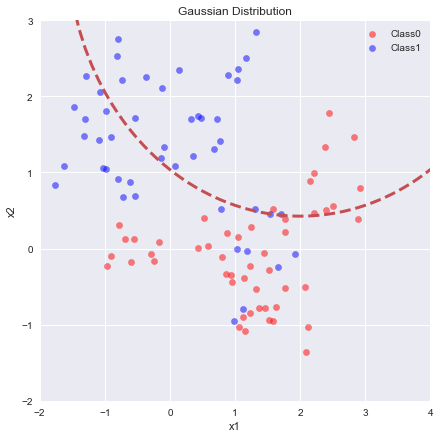

In [11]:
def decision_boundary(x_1):
    """ Calculates the x_2 value for plotting the decision boundary."""
    return 4 - np.sqrt(-x_1**2 + 4*x_1 + 6 + np.log(16))
    
f, ax = plt.subplots(figsize=(7, 7))
ax.scatter(dt2[:50,0], dt2[:50,1], marker='o', color='red', s=40, alpha=0.5)
ax.scatter(dt2[51:,0], dt2[51:,1], marker='o', color='blue', s=40, alpha=0.5)
plt.legend(['Class0', 'Class1'], loc='upper right') 
plt.title('Gaussian Distribution')
plt.ylabel('x2')
plt.xlabel('x1')
x=np.arange(-5,5,0.1)
bound = decision_boundary(x)

plt.axis([-2,4,-2,3])
plt.plot(x,bound,'r--',lw=3)
plt.show()

In [12]:
predict_bayes_class=np.zeros(100)

for i in range(100):
    y=4 - np.sqrt(-dt2[i,0]**2 + 4*dt2[i,0] + 6 + np.log(16))
    if(dt2[i,1]>y):
        predict_bayes_class[i]=1.0
    else:
        predict_bayes_class[i]=0.0
predict_bayes_class=predict_bayes_class.astype(int)
cf2=confusion_matrix(true_class,predict_bayes_class)
true_pos=cf2[1][1]
true_neg=cf2[0][0]
false_pos=cf2[0][1]
false_neg=cf2[1][0]
print("True positives",true_pos)
print("True negatives",true_neg)
print("False positives",false_pos)
print("False negatives",false_neg)

('True positives', 27)
('True negatives', 40)
('False positives', 10)
('False negatives', 23)


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


#### Problem 4
If you aren’t given knowledge of the mis, but are given the subclass labels, show how
to construct the separating boundary. (Note: many methods exist, and some are
better than others. You may use any method you deem reasonable). Show a plot of
your results, and state both false positive and false negative rates.

#### Solution:-
IF the means are not known, then we can use clustering to choose the centroids. K-Means clustering of sklearn library performs upto a maximum of 300 iterations over K clusters to get centroids that don't move around frequently and are stable , thu

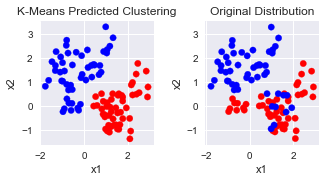

In [13]:
#KMEANS CLUSTERING
k1=pd.DataFrame(dt2)
k1.columns=['x1','x2']
k2=pd.DataFrame(df3['Class']).astype(int)
k2.columns=['Targets']
k2.Targets=k2.Targets.astype(int)
model=KMeans(n_clusters=2)
model.fit(k1)
model.labels_
colormap1=np.array(['Red','Blue'])
plt.subplot(1,2,1)
plt.ylabel('x2')
plt.xlabel('x1')
plt.title('K-Means Predicted Clustering')
plt.scatter(k1.x1,k1.x2,c=colormap1[model.labels_],s=40)
plt.tight_layout(pad=5.0, w_pad=4.0, h_pad=4.0)
plt.subplot(1,2,2)
plt.ylabel('x2')
plt.xlabel('x1')
plt.title('Original Distribution')
plt.scatter(k1.x1,k1.x2,c=colormap1[k2.Targets],s=40)

In [14]:
# Calculating confusion matrix for KMeans CLustering
from sklearn.metrics import confusion_matrix
cf3=confusion_matrix(k2.Targets, model.labels_)
true_pos=cf3[1][1]
true_neg=cf3[0][0]
false_pos=cf3[0][1]
false_neg=cf3[1][0]
print("True positives",true_pos)
print("True negatives",true_neg)
print("False positives",false_pos)
print("False negatives",false_neg)

('True positives', 40)
('True negatives', 41)
('False positives', 9)
('False negatives', 10)


#### Problem 5
If you weren’t provided the {m1, . . . m10} and subclass labels, but were given the
super class labels (class 1,2), what would you do? You don’t have to derive anything,
or code anything up. Simply describe in plain english.

##### Solution:-
1. One of the possible approaches to solve this problem is to approximate or try to guess what the model might have been which has generated this data.
2.	We can also try to use k means to cluster with variable ‘k’. Try to find of a value of k which will work the best and generate a model which is less noisy
3.	We can try to find a function which is parameterised by $x_{1}, x_{2}, x_{1}.x_{2}, x_{1}^{2},x_{2}^{2}$ and higher order terms. This function can then be optimised using linear regression.
		Where,
	$Y = \beta_{00} + \beta_{10} (X_{1}) + \beta_{01} (X_{2}) + \beta_{11} (X_{1}.X_{2}) + \beta_{20} (X_{1}^{2}) + \beta_{02} (X_{2}^{2}) + \beta_{12} (X_{1}.X_{2}^{2}) + ....$